<a href="https://colab.research.google.com/github/Mr-Premanand/Netflix-Movies-And-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

First of all,Import the required libraries and modules 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn import mixture
from sklearn.mixture import GaussianMixture
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc

import collections
from collections import Counter
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel

from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import and define the name to the dataset
netflix = pd.read_csv('/content/drive/MyDrive/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
netflix_df=netflix.copy()               # Create a copy of the original datasets
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## **Data Overview and Summary**

In [4]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [5]:
#get the information of the dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
# get the statistics of the numerical feature
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [16]:
# lets take the columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [20]:
#check the null values in the dataset
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [24]:
# total number of null values
print('total number of null values in the dataset:',netflix_df.isnull().sum().sum())

total number of null values in the dataset: 3631


In [25]:
# check out the unique values in the datset
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [27]:
# from above it is seen that thire are two type, lets checkout
netflix_df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

From above data overview it is seen that : 
* In the given datasets, 7787 records and 12 features are available.
* A total of 3631 null values are present in 5 features (director, cast, country, date_added, rating).
* 'TV Show' and 'Movie' are the two shows that are available on Netflix.
* The oldest show in the dataset was released in 1925, and the most recent in 2021. 


# **Exploratory Data Analysis (EDA)**

## **Netflix Film Types**
Comparison between the total number of movies and shows in this dataset just to get an idea of which one is the majority

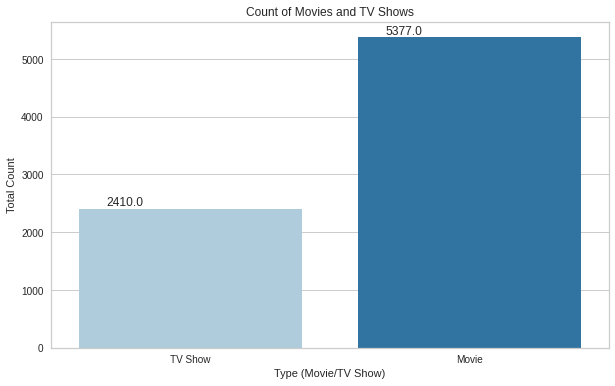

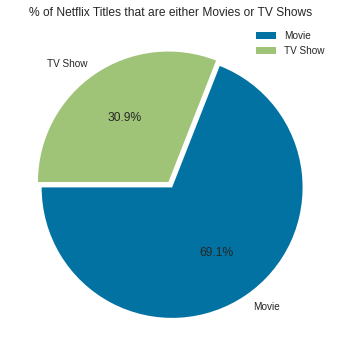

In [59]:
# plot the countplot to know the actual number of data in diffrent types
plt.figure(figsize=(10,6))
ax=sns.countplot(netflix_df.type, palette="Paired")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))      # to print the values on the bar
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

print('\n')

# plot the pie chart to gt the pecentagewise shows
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
plt.pie(netflix_df.type.value_counts(), explode=(0.025,0.025), labels=netflix_df.type.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.legend()
plt.show()

So there are roughly 5377 movies and almost 2410 shows, with movies being the majority. This makes sense since shows are always an ongoing thing and have episodes. If we were to do a headcount of TV show episodes vs. movies, I am sure that TV shows would come out on top. However, in terms of titles, there are far more movie titles (69.1 %) than TV show titles (30.9 %).

## **Netflix Film Ratings**
Now, we will explore the ratings which are based on the film rating system

In [78]:
#Create the two set for the two type of films
netflix_movies_df = netflix_df[netflix_df['type']=='Movie'].copy()       # for movies

netflix_tvshows_df = netflix_df[netflix_df['type']=='TV Show'].copy()       # for TV Shows

Set the order of rating by agewise from young to adults.

In [53]:
# order of rating
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

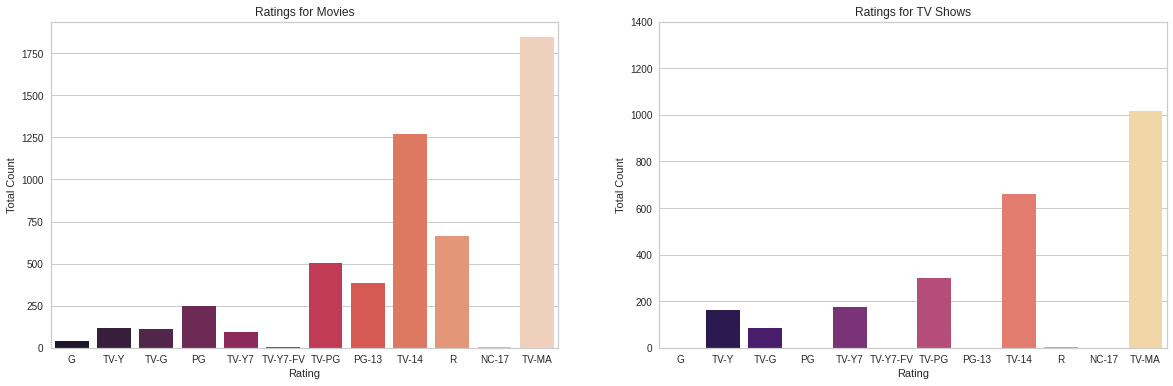

In [79]:
# plot of rating for two diffrent film type

fig, ax = plt.subplots(1,2, figsize=(20, 6)) 
# movies rating
g1 = sns.countplot(netflix_movies_df.rating, order=order,palette="rocket", ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")

# tvshow rating
g2 = sns.countplot(netflix_tvshows_df.rating, order=order,palette="magma", ax=ax[1]);
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
fig.show()

As seen in the above plots, there is much more content for a more mature audience(MA). For the mature audience, there is much more movie content than the TV shows. Also, for the younger audience (under the age of 17), it is the similar, there are more movies than TV shows.

## **Netflix Films Country**
Now we will check the density of the films releases in diffrent country.

In [72]:
# get the dataframe for the countrywise films distribution for top 10 countries
countries = netflix_df.country.value_counts().nlargest(10).reset_index()
countries.rename(columns={ 'index':'country_name','country':'films_counts'},inplace=True)

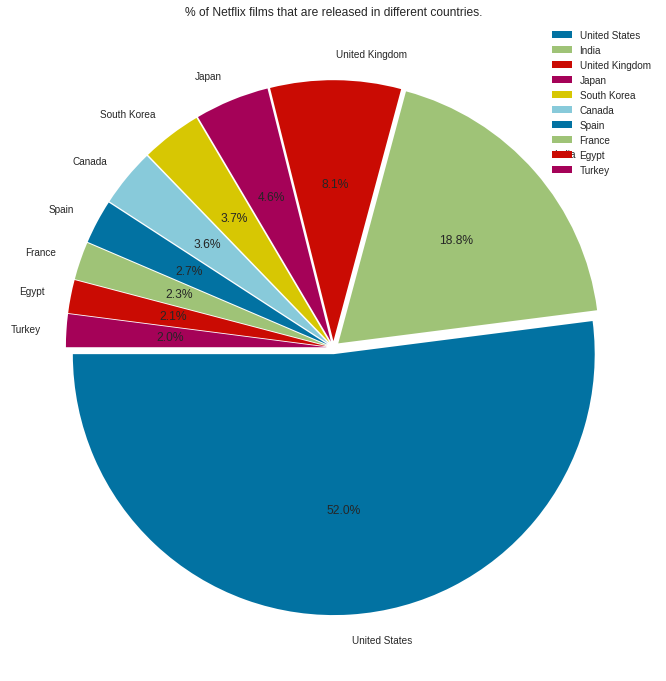

In [76]:
# Now plot the above data
plt.figure(figsize=(12,12))
plt.title("% of Netflix films that are released in different countries.")
plt.pie(countries.films_counts, explode=(0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025), labels=countries.country_name,autopct='%1.1f%%', startangle=180)
plt.legend()
plt.show()

Overall, there is much more content that comes from the United States (52 %) and India (18 %). In the US, Hollywood spends a lot of money on its movies. The US has historically been the largest market for films, so American studios have amassed a lot of wealth and resources. That's why most of the movies come from the US.

## **Content added on Netflix each year**
Now we will take a look at the amount content Netflix has added throughout the previous years.

### **Yearwise**
We will add a 'year_added' column shows the year of the date from the 'date_added' column as shown above.

In [118]:
# add new features
netflix_movies_df['year_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).year
netflix_tvshows_df['year_added'] = pd.DatetimeIndex(netflix_tvshows_df['date_added']).year

I decided to exclude content added during 2021 since the data does not include a full years worth of data.

In [134]:
# take the count of film release and rename the columns name
movies_year=netflix_movies_df.year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movies_year = movies_year[movies_year.year < 2021]
tvshows_year=netflix_tvshows_df.year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
tvshows_year = tvshows_year[tvshows_year.year < 2021]

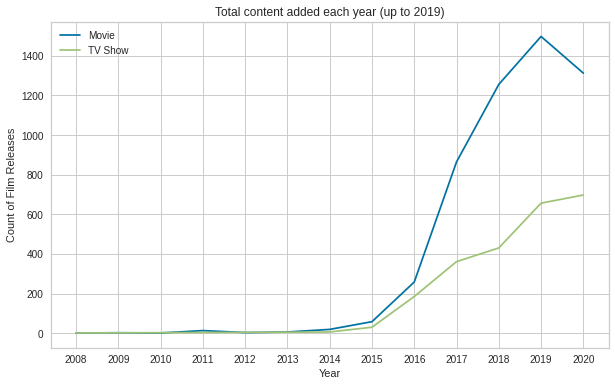

In [135]:
#Plot the lineplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=movies_year, x='year', y='count')
sns.lineplot(data=tvshows_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2021, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Movie','TV Show'])
plt.ylabel("Count of Film Releases")
plt.xlabel("Year")
plt.show()

From above plot we can see that there has been a consistent growth in the number of movies on Netflix compared to tv shows. Based on the above timeline, Netflix started gaining traction after 2014. Since then, the amount of content added has been tremendous.   

### **Monthwise**
Now, take the plot for the monthwise distribution of the releases of the films.

We will add a 'month_added' column shows the year of the date from the 'date_added' column as shown above.

In [136]:
# add new features
netflix_movies_df['month_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).month
netflix_tvshows_df['month_added'] = pd.DatetimeIndex(netflix_tvshows_df['date_added']).month

In [137]:
# take the count of film release and rename the columns name
movies_month=netflix_movies_df.month_added.value_counts().to_frame().reset_index().rename(columns={'index': 'month','month_added':'count'})
movies_month = movies_month[movies_month.month < 2021]
tvshows_month=netflix_tvshows_df.month_added.value_counts().to_frame().reset_index().rename(columns={'index': 'month','month_added':'count'})
tvshows_month = tvshows_month[tvshows_month.month < 2021]

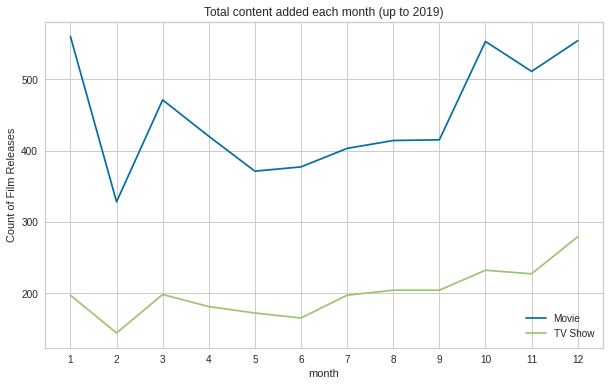

In [140]:
#Plot the lineplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=movies_month, x='month', y='count')
sns.lineplot(data=tvshows_month, x='month', y='count')
ax.set_xticks(np.arange(1,13, 1))
plt.title("Total content added each month (up to 2019)")
plt.legend(['Movie','TV Show'])
plt.ylabel("Count of Film Releases")
plt.xlabel("month")
plt.show()